Objective: To build and AI-ML based classifier model to assign the tickets to the right functional group by analysing the given description and short description with an accuracy of 60% - 80%

In [1]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Initialize variables

project_path = "/content/drive/MyDrive/Capstone NLP/Data/"
data = pd.read_excel(project_path + 'input_data.xlsx')

In [4]:
#Analyse the data

data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [5]:
#Let's look at the shape of the data
data.shape

(8500, 4)

There are 8500 records in total with 4 attributes.

In [6]:
#Let's look at the columns/keys present in the dataset
data.keys()

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [7]:
# Analyse the key attributes of the columns present in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


Notable observations: 
1. The datatype of all the columns present in the dataset in object type.
2. There are no null values present in the Caller and Assignment group columns.
3. 8 null values present in the Short description column
4. 1 null value present in the Description column


Target Column- Assignment group

In [8]:
#No. of unique groups
data['Assignment group'].nunique()

74

In [9]:
#Unique groups present in the dataset
data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

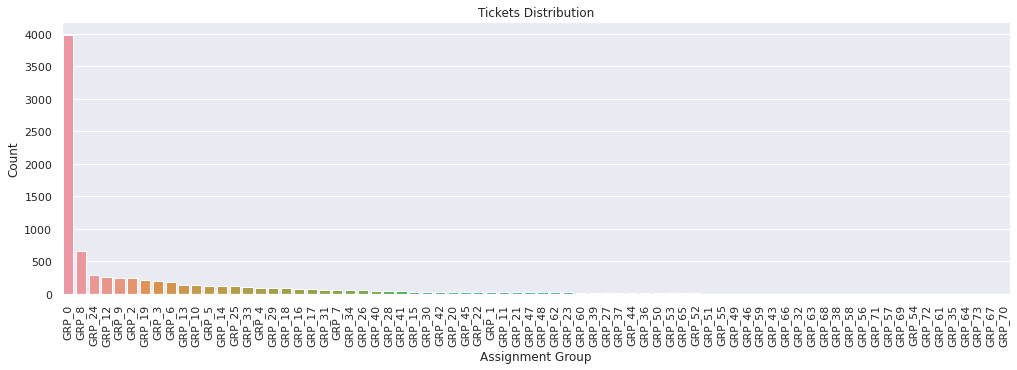

In [10]:
#Visual analysis of distribution of the Assignment group 
plt.subplots(figsize = (17,5))

sns.countplot(x='Assignment group', data=data,order = data['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [12]:
#No. of tickets per assignment group in the given dataset
print(data['Assignment group'].value_counts())

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_64       1
GRP_73       1
GRP_67       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64


In [13]:
data['Assignment group'].describe()

count      8500
unique       74
top       GRP_0
freq       3976
Name: Assignment group, dtype: object

Notable Observations:
1. Total no. of records w.r.t the Assignment group: 8500
2. There are 74 unqiue groups preent in the given dataset
3. Most frequently occuring group in the given dataset is GRP_0
4. GRP_0 occurs 3976 times or 47% in the given dataset


In [14]:
#Analyse the columns of the dataset
data.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


Notable Observations:
1. Total no. of records w.r.t the Short description: 8492
2. There are 7481 unqiue Short description present in the given dataset
3. Most frequently occuring group in the given dataset is 'password reset' which occurs 36 times in the given dataset
4. Total no. of records w.r.t the Description: 8499
5. There are 7817 unqiue Description present in the given dataset
6. Total no. of records w.r.t the Caller: 8500
7. There are 2950 unqiue Callers present in the given dataset
8. Most frequently occuring Caller in the given dataset is 'bpctwhsn kzqsbmtp' which occurs 810 times in the given dataset

In [15]:
#No. of tickets per caller
print(data['Caller'].value_counts())

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
anpwcmdh tjsgualn      1
htwsufnv zaguhmki      1
arkmtcig adpsrxjc      1
recsynqt byoezmla      1
vwaufgxr nvdyhlqk      1
Name: Caller, Length: 2950, dtype: int64


Missing Value Analysis

In [16]:
#Finding null or nan values
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [17]:
data.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [18]:
#Print the records with missing values
nls=np.where(pd.isnull(data))[0]
for nl in nls:
  print(data.iloc[nl])

Short description                                                  NaN
Description          \r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...
Caller                                               ohdrnswl rezuibdt
Assignment group                                                GRP_34
Name: 2604, dtype: object
Short description                                                  NaN
Description          \r\n-connected to the user system using teamvi...
Caller                                               qftpazns fxpnytmk
Assignment group                                                 GRP_0
Name: 3383, dtype: object
Short description                                                  NaN
Description          -user unable  tologin to vpn.\r\n-connected to...
Caller                                               awpcmsey ctdiuqwe
Assignment group                                                 GRP_0
Name: 3906, dtype: object
Short description                                                  NaN

In [19]:
data_copy = data.copy()

In [20]:
#Function to remove the records with the missing values

def RemoveMissing(val):
   val.dropna(inplace=True)
   return val

In [21]:
#Remove the records with missing values(Null/NaN)
RemoveMissing(data_copy)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [22]:
#Check if null still exists
data_copy.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

Records with Null/Missing values removed successfully

In [23]:
#Let's look at the data shape after removing the missing values
data_copy.shape

(8491, 4)

8491 records are present in the given dataset now.

Duplicate Records

In [24]:
#Find the records with duplicate values
data_dup = data_copy[data_copy.duplicated()]
data_dup

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [25]:
print('No. of duplicate records:', data_copy.duplicated().sum())

No. of duplicate records: 83


There are 83 rows in the dataset with duplicate values which can be removed

In [26]:
#Drop the duplicate records
data_copy.drop_duplicates(inplace=True)

In [27]:
#Check if duplicates have been removed or not
data_copy.duplicated().sum()

0

The duplicate records have been removed successfully. 

In [28]:
#Let's look at the shape of the data after removing the duplicates

data_copy.shape

(8408, 4)

After removing the duplicates, we are left with 8408 records in the dataset

Create Custom Column- "Full Description"

In [29]:
#Let's create a new column 'Full Description' by mergining the short description and the description

data_copy['Full Description'] = data_copy['Short description'].map(str) + ' ' + data_copy['Description'].map(str)

In [30]:
data_copy.head()

,Short description,Description,Caller,Assignment group,Full Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [31]:
#Get the length of Full Descrpption column and add that to the data frame
data_copy['Char_len'] = data_copy['Full Description'].str.len()

In [32]:
print('Minimum character length:', data_copy['Char_len'].min())
print('Maximum character length:', data_copy['Char_len'].max())

Minimum character length: 3
Maximum character length: 13104


In [33]:
print('Line with min length:', data_copy[data_copy['Char_len'] == 3]['Full Description'].values[0])

Line with min length: s s


In [34]:
print('Line with max length:', data_copy[data_copy['Char_len'] == 13104]['Full Description'].values[0])

Line with max length: security incidents - ( sw #in33501789 ) : broadscanning: possible vulnerability scanning - 46.161.9.35 we are seeing activity indicating the host at 46.161.9.35 is conducting a vulnerability scan. these scans are used to identify specific vulnerabilities on a remote host that could be exploited to potentially interfere with service availability, execute code, or usa an attacker with unauthorized access. the results of this scan could be used for future attacks or exploitation of the targeted host(s). 

based on our internet visibility we are detecting this as a non-targeted broadscan. similar activity from this source has been detected across our client base. please consider blocking this ip address and investigating the host for any malicious scrip

we are escalating this incident to you via a medium priority ticket as per our default event handling procedures. if you would like us to handle these incidents differently in the future (see below for handling option

In [35]:
data_copy.head()

,Short description,Description,Caller,Assignment group,Full Description,Char_len
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,218
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,202
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,106
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,59
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,25


In [36]:
#Let's first look at full description column of any of the records

data_copy.iloc[4535,4]

'job Job_593 failed in job_scheduler at: 09/13/2016 04:13:00   received from: monitoring_tool@company.com\r\n\r\njob Job_593 failed in job_scheduler at: 09/13/2016 04:13:00'

For EDA, add columns Char_len and Word_len to dataframe
1. Char_len: No. of characters in full description column
2. Word_len: No. of words in full description column

In [37]:
#Get the no. of words in Full Description column and add that to the data frame
data_copy['Word_len'] = data_copy['Full Description'].apply(lambda x :len(str(x).split()))
data_copy.head()

,Short description,Description,Caller,Assignment group,Full Description,Char_len,Word_len
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,218,35
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,202,26
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,106,16
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,59,10
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,25,4


In [38]:
#Word_len
print('Minimum character length:', data_copy['Word_len'].min())
print('Maximum character length:', data_copy['Word_len'].max())

Minimum character length: 2
Maximum character length: 1639


Visual Analysis: Distribution of char_len across the given dataset

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


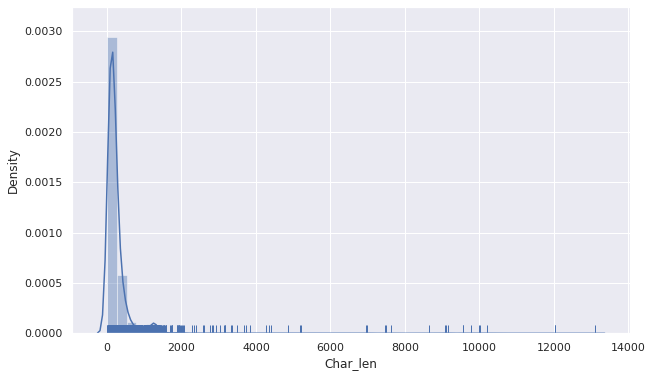

In [39]:
plt.subplots(figsize = (10,6))
sns.distplot(data_copy['Char_len'], rug=True)
plt.show()

In [40]:
data_copy['Char_len'].describe()

count     8408.000000
mean       253.855495
std        527.989083
min          3.000000
25%         84.000000
50%        167.000000
75%        250.000000
max      13104.000000
Name: Char_len, dtype: float64

Char_len to be used:

In [41]:
# Text preprocessing
from wordcloud import WordCloud, STOPWORDS

In [42]:
print(STOPWORDS)

{"they'll", 'when', 'me', 'while', 'being', "hadn't", 'our', "mustn't", 'i', 'once', 'some', 'here', 'can', 'yourself', 'out', "you're", 'him', 'or', "why's", 'your', 'so', 'from', "she'll", "we'll", "shouldn't", 'whom', "we'd", "he'd", 'r', 'ought', "they're", 'my', 'and', 'if', 'with', 'why', 'but', 'have', 'cannot', 'myself', "they've", 'through', 'an', 'has', "who's", 'be', 'was', 'ever', 'they', "let's", "wouldn't", 'own', "won't", 'ourselves', 'above', 'for', 'www', 'else', 'few', "don't", "he'll", 'this', 'himself', 'shall', 'there', 'the', 'below', "you've", 'during', "they'd", 'any', "here's", 'over', "can't", 'down', 'http', 'she', 'those', 'who', 'get', 'most', 'on', 'however', "she'd", 'themselves', 'doing', 'do', 'had', 'herself', "what's", 'not', "how's", 'very', 'each', "hasn't", 'could', 'how', 'only', 'into', 'by', "haven't", 'hers', "we're", 'yours', 'are', 'off', 'should', 'other', 'all', "i'll", "i've", 'her', 'these', 'also', 'too', 'been', 'which', 'before', "does

Add columns STOPWORDS_len and STOPWORDS to the dataframe
1. STOPWORDS_len: No. of stopwords in the full description column
2. STOPWORDS: Stop words in the full description column

In [43]:
#Apply stop words to the full description column of the dataset
data_copy['STOPWORDS_len']=data_copy['Full Description'].apply(lambda x : len([t for t in x.split() if t in STOPWORDS]))
data_copy['STOPWORDS'] = data_copy['Full Description'].apply(lambda x : [t for t in x.split() if t in STOPWORDS])

In [44]:
data_copy.head()

,Short description,Description,Caller,Assignment group,Full Description,Char_len,Word_len,STOPWORDS_len,STOPWORDS
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,218,35,11,"[the, in, and, the, the, to, and, that, he, wa..."
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,202,26,8,"[my, are, not, in, my, can, how, to]"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,106,16,6,"[in, to, i, cannot, on, to]"
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,59,10,2,"[to, to]"
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,25,4,0,[]


In [45]:
#Text Pre-processing

import nltk
import string
import spacy
import re
import unicodedata

#Beautiful Soup is a library that makes it easy to scrape information from web pages.
from bs4 import BeautifulSoup  


In [46]:
#Define a function to clean the data
callers = data_copy['Caller'].unique() 
def text_preprocessing(text):
  # Remove html tags
  text=BeautifulSoup(text,'html.parser').get_text()     #It returns all the text in a document or beneath a tag, as a single Unicode string.
  # Remove Accented text
  text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')

  # Removing special chars
  pat=r'[^A-Za-z0-9.,!?/:;\"\'\s]'
  text=re.sub(pat,' ',text)
  # Remove punctuations
  text=''.join([t for t in text if t not in string.punctuation])

  #text = ' '.join([w for w in text.split() if not is_valid_date(w)])
  text = re.sub(r"received from:",' ',text)
  text = re.sub(r"from:",' ',text)
  text = re.sub(r"to:",' ',text)
  text = re.sub(r"subject:",' ',text)
  text = re.sub(r"sent:",' ',text)
  text = re.sub(r"ic:",' ',text)
  text = re.sub(r"cc:",' ',text)
  text = re.sub(r"bcc:",' ',text)  

  # Remove extra white spaces
  text=re.sub('\s+',' ',text)

  # Remove new line characters 
  text = re.sub(r'\n',' ',text)

  # Lower case
  text=text.lower()

  # Removing HTML tags
  cleanr = re.compile('<.*?>')
  text = re.sub(cleanr, ' ',text)
  # Remove Email Id
  text = re.sub(r'\S*@\S*\s?', '', text)
  
  # Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()
  # Remove numbers
  text = re.sub(r'\d+','' ,text)

  # Remove hyperlinks
  text = re.sub(r'https?:\/\/.*\/\w*', '', text) 

  # Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()

  # Remove unreadable characters  (also extra spaces)
  text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
  for name in callers:
    namelist = [part for part in name.split()]
    for namepart in namelist:
      text = text.replace(namepart,'')

  return text


In [47]:
#Let's look at the full description of one of the tickets
data_copy['Full Description'][84]

'engineering tool drawing originals in pdf format are not shown hello it service,\r\ni need to monitor the manufacturing drawings to approve manufacturing.\r\nthe engineering tool stopped showing pdf originals:\r\n\r\nprocess: \r\n\r\n\r\n[[erp] /production_order_interface_vendor/bas_cr 167 - rfc destination production_order_interface_vendor-views-010 not accessible (file cannot be stamped now; ).]\r\n  08:06:34  \r\n    bapireturnederrorexception\r\n    [stack trace]\r\n    cadagent.erp.conn.jco.tm.jcoerpmanager.handlereturnstructureorreturntableline(jcoerpmanager.java:379, @(#) $id: jcoerpmanager.java 60470 2015-07-24 09:02:22z wt $)\r\n    cadagent.erp.conn.jco.tm.jcoerpmanager.handlereturnstructure(jcoerpmanager.java:360, @(#) $id: jcoerpmanager.java 60470 2015-07-24 09:02:22z wt $)\r\n    cadagent.erp.conn.jco.tm.jcoerpmanager.generirtcfunction(jcoerpmanager.java:324, @(#) $id: jcoerpmanager.java 60470 2015-07-24 09:02:22z wt $)\r\n    cadagent.objmod.plmfile.checkoutview(plmfile.

In [48]:
#Apply text preprocessing to the full description column of the data frame

data_copy['Full Description'] = data_copy['Full Description'].apply(text_preprocessing)

In [49]:
#Let's look at the full description of the same ticket after text preprocessing
data_copy['Full Description'][84]

'engineering tool drawing originals in pdf format are not shown hello it service i need to monitor the manufacturing drawings to approve manufacturing the engineering tool stopped showing pdf originals process erp production order interface vendorbas cr rfc destination production order interface vendor views not accessible file cannot be stamped now bapireturnederrorexception stack trace cadagenterpconnjcotmjcoerpmanagerhandlereturnstructureorreturntableline jcoerpmanagerjava id jcoerpmanagerjava z wt cadagenterpconnjcotmjcoerpmanagerhandlereturnstructure jcoerpmanagerjava id jcoerpmanagerjava z wt cadagenterpconnjcotmjcoerpmanagergenerirtcfunction jcoerpmanagerjava id jcoerpmanagerjava z wt cadagentobjmodplmfilecheckoutview plmfilejava id plmfilejava z aju plmomfomforiginalsexportcheckoutbapi omforiginalsexportjava id omforiginalsexportjava z rb plmomfomforiginalsexportdownloaddocumentoriginals omforiginalsexportjava id omforiginalsexportjava z rb plmomfomforiginalsexportactionperform

It can be seen by looking at the description and short description that the data belongs to more than one language

In [50]:
 !pip install langdetect
 from langdetect import detect
 data_copy['language'] = data_copy['Full Description'].apply(detect)

     |████████████████████████████████| 983kB 22.1MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=07832222b0ad3d06ac4b48ddac068df9ee35d70d2171b1f16c12fc0fbf6085ad
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [51]:
data_copy.head(10)

,Short description,Description,Caller,Assignment group,Full Description,Char_len,Word_len,STOPWORDS_len,STOPWORDS,language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee man...,218,35,11,"[the, in, and, the, the, to, and, that, he, wa...",en
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook received from gmailcom hello team my ...,202,26,8,"[my, are, not, in, my, can, how, to]",en
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from gmailcom hi ...,106,16,6,"[in, to, i, cannot, on, to]",en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,59,10,2,"[to, to]",en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,25,4,0,[],no
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,93,18,8,"[to, in, to, and, to, in, to, and]",en
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event criticalhostname companycom the value of...,259,20,7,"[the, of, for, the, of, for, is]",en
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket no employment status new non employee e...,149,18,0,[],en
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,73,14,4,"[to, on, to, on]",en
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant ticket update on inplant,63,8,2,"[on, on]",en


In [52]:
print('Languages identified:', data_copy['language'].unique())
print('No. of Languages identified:', len(data_copy['language'].unique()))

Languages identified: ['en' 'no' 'es' 'it' 'fr' 'af' 'sv' 'nl' 'ca' 'tl' 'id' 'fi' 'de' 'cy'
 'ro' 'pl' 'et' 'da' 'so' 'pt' 'sw' 'hu' 'sl' 'cs' 'sk' 'hr' 'lt' 'tr']
No. of Languages identified: 28


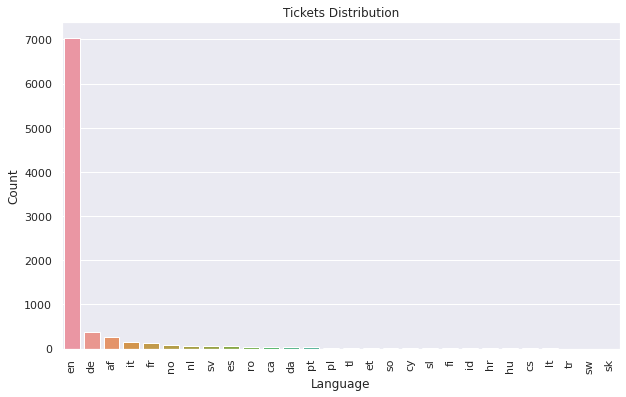

In [53]:
plt.subplots(figsize = (10,6))

sns.countplot(x='language', data=data_copy,order = data_copy['language'].value_counts().index)
plt.xlabel('Language') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [54]:
#Lemmatization

from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

def lemmatize_text(text):
  doc = nlp(text)
  return ' '.join([token.lemma_ for token in doc])



data_copy['Full Description'] = data_copy['Full Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [55]:
#Let's look at the Full Description column after lemmetization
data_copy['Full Description'][84]

'engineering tool drawing original in pdf format be not show hello -PRON- service i need to monitor the manufacturing drawing to approve manufacture the engineering tool stop show pdf original process erp production order interface vendorbas cr rfc destination production order interface vendor view not accessible file can not be stamp now bapireturnederrorexception stack trace cadagenterpconnjcotmjcoerpmanagerhandlereturnstructureorreturntableline jcoerpmanagerjava -PRON- would jcoerpmanagerjava z wt cadagenterpconnjcotmjcoerpmanagerhandlereturnstructure jcoerpmanagerjava -PRON- would jcoerpmanagerjava z wt cadagenterpconnjcotmjcoerpmanagergenerirtcfunction jcoerpmanagerjava -PRON- would jcoerpmanagerjava z wt cadagentobjmodplmfilecheckoutview plmfilejava -PRON- would plmfilejava z aju plmomfomforiginalsexportcheckoutbapi omforiginalsexportjava -PRON- would omforiginalsexportjava z rb plmomfomforiginalsexportdownloaddocumentoriginal omforiginalsexportjava -PRON- would omforiginalsexpor

In [56]:
#Create a copy of the clean data
data_clean = data_copy.copy()

In [57]:
data_clean.head()

,Short description,Description,Caller,Assignment group,Full Description,Char_len,Word_len,STOPWORDS_len,STOPWORDS,language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,218,35,11,"[the, in, and, the, the, to, and, that, he, wa...",en
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook receive from gmailcom hello team -PR...,202,26,8,"[my, are, not, in, my, can, how, to]",en
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from gmailcom ...,106,16,6,"[in, to, i, cannot, on, to]",en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,59,10,2,"[to, to]",en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,25,4,0,[],no


In [58]:
data_eng = data_clean[data_clean['language'] == 'en']
data_eng.head()

,Short description,Description,Caller,Assignment group,Full Description,Char_len,Word_len,STOPWORDS_len,STOPWORDS,language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,218,35,11,"[the, in, and, the, the, to, and, that, he, wa...",en
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook receive from gmailcom hello team -PR...,202,26,8,"[my, are, not, in, my, can, how, to]",en
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from gmailcom ...,106,16,6,"[in, to, i, cannot, on, to]",en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,59,10,2,"[to, to]",en
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,93,18,8,"[to, in, to, and, to, in, to, and]",en


In [59]:
data_eng.shape

(7033, 10)

In [60]:
#Remove unwanted columns

data_clean = data_clean.drop(['Short description', 'Description', 'Caller', 'Char_len', 'Word_len', 'STOPWORDS_len', 'STOPWORDS', 'language'], axis=1)
data_eng = data_eng.drop(['Short description', 'Description', 'Caller', 'Char_len', 'Word_len', 'STOPWORDS_len', 'STOPWORDS', 'language'], axis=1)

In [61]:
data_clean.head()

,Assignment group,Full Description
0,GRP_0,login issue verify user detail employee manage...
1,GRP_0,outlook receive from gmailcom hello team -PR...
2,GRP_0,can not log in to vpn receive from gmailcom ...
3,GRP_0,unable to access hr tool page unable to access...
4,GRP_0,skype error skype error


In [62]:
data_eng.head()

,Assignment group,Full Description
0,GRP_0,login issue verify user detail employee manage...
1,GRP_0,outlook receive from gmailcom hello team -PR...
2,GRP_0,can not log in to vpn receive from gmailcom ...
3,GRP_0,unable to access hr tool page unable to access...
5,GRP_0,unable to log in to engineering tool and skype...


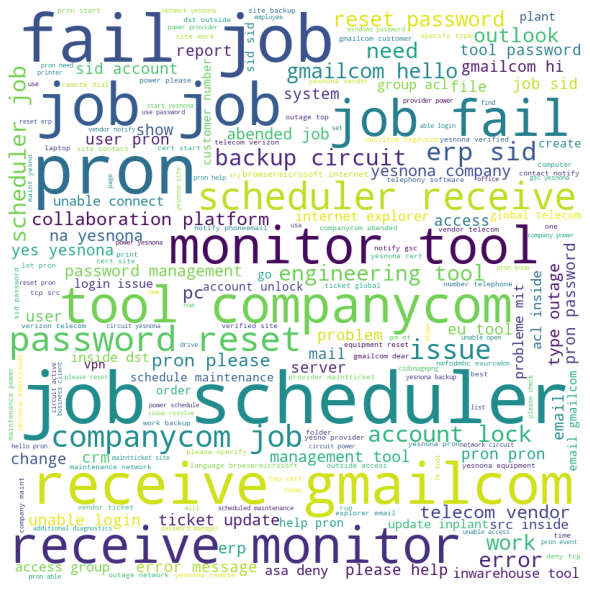

In [63]:
#Let's look at the important words w.r.t to context and frequency
Words=''
stopwords= set(STOPWORDS)

for val in data_clean['Full Description']:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()

  Words+=" ".join(tokens)+ " "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(Words)

wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**MODEL BUILDING**

ML Based Classification Models

In [64]:
#import necessary packages for model building

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [65]:
data_clean.shape

(8408, 2)

Using TF-IDF Vectorizer approach

In [66]:
#Split into train and test data into 85 / 15 ratio

X_train, X_test, y_train, y_test = train_test_split(
    data_clean['Full Description'].values, data_clean['Assignment group'].values, 
    test_size=0.15, random_state=0)
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 7146
Validation utterances: 1262


In [67]:
#Calculating tf-idf scores with unigrams

vectorizer = TfidfVectorizer(ngram_range=(1,1)) # You can still specify n-grams here.
X_train_unigram = vectorizer.fit_transform(X_train)
X_test_unigram = vectorizer.transform(X_test)
X_train_unigram, X_test_unigram

(<7146x11920 sparse matrix of type '<class 'numpy.float64'>'
 	with 140476 stored elements in Compressed Sparse Row format>,
 <1262x11920 sparse matrix of type '<class 'numpy.float64'>'
 	with 23378 stored elements in Compressed Sparse Row format>)

In [68]:
print(vectorizer.vocabulary_)

{'job': 5590, 'fail': 3931, 'in': 5206, 'scheduler': 9104, 'at': 777, 'receive': 8499, 'from': 4272, 'monitor': 6835, 'tool': 10416, 'companycom': 1946, 'printer': 8080, 'problem': 8105, 'issue': 5446, 'information': 5273, 'please': 7889, 'complete': 1982, 'all': 428, 'require': 8684, 'question': 8342, 'below': 1159, 'if': 5135, 'not': 7228, 'pron': 8166, 'will': 11413, 'be': 1100, 'return': 8746, 'back': 996, 'to': 10390, 'the': 10254, 'gsc': 4637, 'requester': 8682, 'provide': 8187, 'review': 8757, 'ticket': 10330, 'able': 90, 'resolve': 8711, 'then': 10262, 'assign': 756, 'appropriate': 672, 'group': 4627, 'per': 7745, 'assignment': 758, 'flowchart': 4139, 'name': 6968, 'make': 6450, 'model': 6809, 'ex': 3811, 'hq': 4969, 'wy': 11567, 'hp': 4965, 'kd': 5735, 'color': 1911, 'laserjet': 6026, 'pcl': 7719, 'detailed': 2702, 'description': 2684, 'of': 7347, 'when': 11366, 'try': 10560, 'send': 9221, 'document': 3002, 'this': 10283, 'say': 9062, 'driver': 3085, 'update': 10763, 'need': 7

In [69]:
#Feature Selection using chi-square test

from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=5000)
X_train_unigram = ch2.fit_transform(X_train_unigram, y_train)
X_test_unigram = ch2.transform(X_test_unigram)

X_train_unigram, X_test_unigram

(<7146x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 121538 stored elements in Compressed Sparse Row format>,
 <1262x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 20676 stored elements in Compressed Sparse Row format>)

In [70]:
#Naive Bayes classifier with unigrams

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(X_train_unigram, y_train)
pred = clf.predict(X_test_unigram)
print("Train accuracy = ",clf.score(X_train_unigram, y_train))
print("Test accuracy = ",clf.score(X_test_unigram, y_test))

Train accuracy =  0.570528967254408
Test accuracy =  0.5752773375594294


In [71]:
#Classification_report Naive Bayes classifier with unigrams
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.57      1.00      0.73       606
      GRP_10       0.00      0.00      0.00        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.73      0.21      0.32        39
      GRP_13       0.00      0.00      0.00        21
      GRP_14       1.00      0.05      0.09        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.00      0.00      0.00        13
      GRP_18       0.00      0.00      0.00        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       0.60      0.10      0.17        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       1.00      0.51      0.68        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
#SVM classifier with unigrams

from sklearn import svm
clf = svm.SVC(gamma=0.025, C=10)    
clf.fit(X_train_unigram , y_train)
pred = clf.predict(X_test_unigram)
print("Train accuracy = ",clf.score(X_train_unigram, y_train))
print("Test accuracy = ",clf.score(X_test_unigram, y_test))

Train accuracy =  0.6648474671144696
Test accuracy =  0.6426307448494454


In [73]:
#Classification_report SVM classifier with unigrams
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.64      0.99      0.77       606
      GRP_10       1.00      0.23      0.38        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.56      0.38      0.45        39
      GRP_13       0.64      0.43      0.51        21
      GRP_14       0.67      0.19      0.30        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.91      0.77      0.83        13
      GRP_18       0.40      0.14      0.21        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       0.53      0.30      0.38        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       0.97      0.73      0.84        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
#Decision tree classifier with unigrams

from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 12,random_state=1)
dTree.fit(X_train_unigram, y_train)
pred = dTree.predict(X_test_unigram)
print("Train accuracy = ",dTree.score(X_train_unigram, y_train))
print("Test accuracy = ",dTree.score(X_test_unigram, y_test))

Train accuracy =  0.6307024909040022
Test accuracy =  0.6093502377179081


In [75]:
#Classification_report Decision tree classifier with unigrams
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.61      0.97      0.75       606
      GRP_10       0.86      0.23      0.36        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.57      0.41      0.48        39
      GRP_13       0.67      0.29      0.40        21
      GRP_14       0.50      0.24      0.32        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.91      0.77      0.83        13
      GRP_18       0.50      0.07      0.12        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       0.42      0.17      0.24        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       0.97      0.69      0.81        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
#Random Forest classifier with unigrams

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features = 12)
rfcl = rfcl.fit(X_train_unigram, y_train)
pred = rfcl.predict(X_test_unigram)
print("Train accuracy = ",rfcl.score(X_train_unigram, y_train))
print("Test accuracy = ",rfcl.score(X_test_unigram, y_test))

Train accuracy =  0.9506017352364959
Test accuracy =  0.6410459587955626


In [77]:
#Classification_report Random Forest classifier with unigrams
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.62      0.99      0.77       606
       GRP_1       0.00      0.00      0.00         0
      GRP_10       1.00      0.23      0.38        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.83      0.26      0.39        39
      GRP_13       0.75      0.14      0.24        21
      GRP_14       0.44      0.19      0.27        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.90      0.69      0.78        13
      GRP_18       1.00      0.07      0.13        14
      GRP_19       0.75      0.10      0.17        31
       GRP_2       0.70      0.23      0.35        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.50      0.25      0.33         4
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Glove-Embeddings approach

In [78]:
#import necessary packages for model building

from nltk.tokenize import RegexpTokenizer
import numpy as np
import re

In [79]:
#Regular expression based tokenizers to consider only alphabetical sequences and ignore numerical sequences

def complaint_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [80]:
#Extracing all the unique words from the dataset

all_words = list()
for comp in data_clean['Full Description']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [81]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 13045


In [82]:
print('Complaint\n', data_clean['Full Description'][100], '\n')
print('Tokens\n', complaint_to_words(data_clean['Full Description'][100]))

Complaint
 re ess portal access issue receive from   gmailcom hello -PRON- be an kiosk user please reset the password and confirm     gmailcom from    send october to company ticket toolcom subject ess portal access issue hi below mention employee krlszbqo spimolgz with user -PRON- would sv be not able to login to ess portal to access -PRON- pay slip and related content -PRON- be a attendance tool user please reset -PRON- user -PRON- would and password and revert back 

Tokens
 ['re', 'ess', 'portal', 'access', 'issue', 'receive', 'from', 'gmailcom', 'hello', 'pron', 'be', 'an', 'kiosk', 'user', 'please', 'reset', 'the', 'password', 'and', 'confirm', 'gmailcom', 'from', 'send', 'october', 'to', 'company', 'ticket', 'toolcom', 'subject', 'ess', 'portal', 'access', 'issue', 'hi', 'below', 'mention', 'employee', 'krlszbqo', 'spimolgz', 'with', 'user', 'pron', 'would', 'sv', 'be', 'not', 'able', 'to', 'login', 'to', 'ess', 'portal', 'to', 'access', 'pron', 'pay', 'slip', 'and', 'related', 

In [83]:
#Indexing each unique word in the dataset by assigning it a unique number.

index_dict = dict()
count = 1
index_dict['<unk>'] = 0
for word in set(all_words):
    index_dict[word] = count
    count += 1

In [84]:
#Utilizing indexed words to replace words by index

embeddings_index = {}
f = open('/content/drive/MyDrive/Capstone NLP/Data/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [85]:
#Taking average of all word embeddings in a sentence to generate the sentence representation

data_list = list()
for comp in data_clean['Full Description']:
    sentence = np.zeros(300)
    count = 0
    for w in complaint_to_words(comp):
        try:
            sentence += embeddings_index[w]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [86]:
#Converting categrical labels to numerical format and further one hot encoding on the numerical labels.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_clean['Assignment group'])
data_clean['Target'] = le.transform(data_clean['Assignment group'])
data_clean.head(10)

,Assignment group,Full Description,Target
0,GRP_0,login issue verify user detail employee manage...,0
1,GRP_0,outlook receive from gmailcom hello team -PR...,0
2,GRP_0,can not log in to vpn receive from gmailcom ...,0
3,GRP_0,unable to access hr tool page unable to access...,0
4,GRP_0,skype error skype error,0
5,GRP_0,unable to log in to engineering tool and skype...,0
6,GRP_1,event criticalhostname companycom the value of...,1
7,GRP_0,ticket no employment status new non employee e...,0
8,GRP_0,unable to disable add in on outlook unable to ...,0
9,GRP_0,ticket update on inplant ticket update on inplant,0


In [87]:
#since there are few NaNs creating a new dataframe by dropping the rows
my_data = pd.DataFrame(np.array(data_list)) 

In [88]:
my_data.shape

(8408, 300)

In [89]:
my_data['output'] = pd.DataFrame(data_clean.Target.values)

In [90]:
my_data.shape

(8408, 301)

In [91]:
my_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,output
0,-0.135278,0.181936,-0.034501,-0.209287,0.079136,-0.015559,0.012361,-0.026924,0.045794,-1.318716,-0.087101,0.035890,0.121047,-0.149388,-0.100558,0.088361,-0.073418,-0.081166,-0.100973,-0.097266,0.040563,0.102315,0.006061,-0.046389,-0.224134,-0.155111,0.093223,0.155020,0.007697,0.083904,0.094092,0.027256,-0.127925,0.084373,-0.519809,-0.070309,-0.100122,-0.051417,-0.185736,-0.050801,...,-0.067750,0.023234,0.104099,-0.090841,0.004927,-0.012318,0.034525,0.162699,-0.030617,0.055214,-0.137539,0.045108,-0.001629,-0.113061,0.021757,-1.469435,-0.073366,0.526662,0.142217,-0.103021,0.132317,-0.033725,0.062647,-0.134880,-0.048103,0.135102,-0.009246,-0.167211,-0.002242,0.000546,-0.176441,0.014254,-0.209503,-0.032807,-0.029518,0.000248,0.001169,-0.141386,0.011633,0
1,-0.107702,-0.101941,-0.111530,-0.078466,-0.084525,0.136049,-0.095593,0.054875,-0.064657,-1.257695,0.112130,0.029395,0.089067,0.096170,-0.039120,-0.082568,-0.115338,-0.025283,0.002502,-0.241950,0.038278,0.095132,0.145691,0.141718,-0.181738,-0.054097,0.075741,-0.048306,0.071638,0.068055,0.082912,0.093758,-0.122197,-0.021370,-0.674658,0.187408,-0.074273,-0.044298,-0.118217,-0.009997,...,-0.163713,0.047194,0.078612,-0.005191,-0.113593,-0.029227,0.107406,-0.015186,-0.004954,0.006944,-0.087118,0.135907,0.017375,-0.005648,0.044434,-1.390103,0.085688,0.445894,-0.161106,-0.117279,0.039410,-0.125513,0.113149,-0.021805,0.057421,0.152484,-0.039931,-0.114768,-0.039913,0.001218,-0.129244,-0.009133,-0.041335,0.149489,-0.155082,-0.097264,-0.154871,0.022903,0.048405,0
2,-0.223814,0.121895,-0.251171,-0.124431,-0.053966,0.044268,0.029553,-0.066563,0.012776,-1.388437,0.047502,0.017737,0.005774,-0.060754,0.094973,0.133253,-0.260122,-0.007493,0.012263,-0.188024,0.103542,-0.023305,0.236036,0.079395,-0.231688,-0.096633,0.093639,0.009422,0.002823,0.164540,-0.086214,0.264448,-0.188143,-0.084108,-0.673041,0.061285,-0.016819,0.002188,-0.046354,-0.135619,...,-0.283103,0.038323,0.070601,0.036046,-0.071841,0.086852,-0.127042,0.197421,0.072063,0.068903,-0.080048,0.269100,0.088620,-0.069850,-0.090583,-1.743857,0.048600,0.168672,-0.092725,-0.218898,-0.123150,-0.141030,0.197681,-0.140213,-0.030457,0.115952,0.123571,-0.079158,-0.093802,-0.022198,-0.214194,-0.004868,-0.105438,0.042311,-0.125857,0.010108,-0.215780,0.041081,0.067021,0
3,-0.187629,-0.035575,-0.047293,-0.145138,0.006650,0.117299,-0.051229,0.042207,-0.029271,-1.248585,-0.005705,0.119115,0.059009,-0.106729,-0.133435,0.009338,-0.159200,-0.040136,-0.005715,-0.249532,-0.110662,0.119744,0.033766,-0.032977,-0.121297,0.109935,0.150933,0.272941,0.171596,0.088935,-0.004436,0.056536,0.000599,0.109081,-0.644632,-0.185475,-0.031935,-0.009725,-0.083440,-0.310403,...,-0.327507,-0.125554,-0.055251,-0.073089,0.145839,-0.111859,0.021422,0.263997,-0.122942,-0.145326,0.079520,0.123046,-0.139837,-0.136310,-0.100013,-1.510383,0.157966,0.454368,0.055928,-0.027933,-0.177190,0.109317,0.089652,-0.052732,-0.236185,0.175160,0.132945,-0.115755,-0.036681,-0.020283,-0.343860,-0.205300,-0.055153,0.120709,0.125678,-0.001634,-0.144610,-0.077548,-0.029825,0
4,-0.115430,0.247580,-0.081420,0.206040,-0.257983,-0.136205,-0.014090,-0.329545,0.296080,-0.777870,0.083184,0.337969,-0.359810,-0.466914,0.566890,0.087570,-0.266779,0.032848,0.181004,0.246015,0.270484,-0.207170,-0.582585,-0.011975,-0.005478,-0.015399,0.140471,0.132922,0.025683,0.155510,0.019223,0.097660,0.082905,-0.069666,-0.543820,-0.306765,-0.350180,0.313390,-0.311727,0.017175,...,-0.021193,0.041719,0.207997,-0.392565,0.412720,0.196530,0.204280,-0.008970,0.331555,0.030550,0.199266,-0.168155,0.205421,-0.355475,0.135610,-0.732010,0.061810,0.116505,0.288225,-0.509995,0.553335,-0.126650,0.057340,0.542085,-0.317690,-0.190706,-0.262482,-0.421000,0.329705,0.093227

In [92]:
my_new_data = my_data.dropna(how='any')

In [93]:
my_new_data.shape

(8395, 301)

In [94]:
my_new_data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
296       0
297       0
298       0
299       0
output    0
Length: 301, dtype: int64

In [95]:
#Train--Test split in 85 / 15 ratio
from sklearn.model_selection import train_test_split
X = my_new_data.drop('output',axis=1)
y = my_new_data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [96]:
#SVM classifier

from sklearn import svm
clf = svm.SVC(gamma=0.025, C=100)    
clf.fit(X_train , y_train)
pred = clf.predict(X_test)
pred_train = clf.predict(X_train)
print('Train:',accuracy_score(y_train, pred_train))
print('Test:', accuracy_score(y_test, pred))

Train: 0.8925017519271198
Test: 0.6658730158730158


In [97]:
#Classification_report SVM classifier
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       612
           1       0.33      0.33      0.33         3
           2       0.60      0.45      0.51        20
           3       0.00      0.00      0.00         2
           4       0.61      0.61      0.61        41
           5       0.38      0.26      0.31        23
           6       0.30      0.18      0.22        17
           7       0.33      0.17      0.22         6
           8       0.43      0.33      0.38         9
           9       0.91      0.91      0.91        11
          10       0.45      0.42      0.43        12
          11       0.40      0.19      0.26        32
          12       0.59      0.53      0.56        32
          13       0.20      0.17      0.18         6
          14       0.00      0.00      0.00         8
          15       0.50      0.20      0.29         5
          16       0.60      1.00      0.75         3
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
#Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 9,random_state=1)
dTree.fit(X_train, y_train)
pred = dTree.predict(X_test)
print('Train:',dTree.score(X_train, y_train))
print('Test:',dTree.score(X_test, y_test))

Train: 0.6227049754730203
Test: 0.5587301587301587


In [99]:
#Classification_report Decision tree classifier
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

           0       0.63      0.90      0.74       612
           1       0.00      0.00      0.00         3
           2       0.55      0.30      0.39        20
           3       0.00      0.00      0.00         2
           4       0.24      0.17      0.20        41
           5       0.00      0.00      0.00        23
           6       0.14      0.06      0.08        17
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         9
           9       0.67      0.36      0.47        11
          10       0.00      0.00      0.00        12
          11       0.09      0.03      0.05        32
          12       0.39      0.28      0.33        32
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         3
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
#Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features = 12)
rfcl = rfcl.fit(X_train, y_train)
pred = rfcl.predict(X_test)
print('Train:', rfcl.score(X_train, y_train))
print('Test:', rfcl.score(X_test, y_test))

Train: 0.9516468114926419
Test: 0.6142857142857143


In [101]:
#Classification_report Random Forest classifier
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

           0       0.61      0.99      0.75       612
           1       0.50      0.33      0.40         3
           2       1.00      0.25      0.40        20
           3       0.00      0.00      0.00         2
           4       0.67      0.34      0.45        41
           5       0.50      0.04      0.08        23
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         9
           9       1.00      0.45      0.62        11
          10       1.00      0.08      0.15        12
          11       1.00      0.03      0.06        32
          12       0.69      0.28      0.40        32
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         3
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AI- Based Classification Models(Deep Learning)

In [102]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed, BatchNormalization, Activation, Input, Conv1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras import optimizers
from keras.layers import PReLU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Concatenate

In [103]:
#Initialize variables

max_features = 10000
embedding_size = 200
max_len=200
batch_size=64
epochs=20

In [104]:
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data_clean['Full Description'].values)       
sequences = tokenizer.texts_to_sequences(data_clean['Full Description'].values)     

In [105]:
X_nn=tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)
Y_nn = pd.get_dummies(data_clean['Assignment group']).values   

In [106]:
print('Shape of input tensor:', X_nn.shape)

Shape of input tensor: (8408, 200)


In [107]:
print('Shape of label tensor:', Y_nn.shape)

Shape of label tensor: (8408, 74)


In [108]:
X_nn[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  49,  30, 545,  26,
       170, 195, 128,  63,  91,   4,  26,  63,   5, 233,  12,  2

In [109]:
Y_nn[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [110]:
from sklearn.model_selection import train_test_split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn,Y_nn, test_size = 0.15, random_state = 42)
print(X_train_nn.shape,y_train_nn.shape)
print(X_test_nn.shape,y_test_nn.shape)

(7146, 200) (7146, 74)
(1262, 200) (1262, 74)


In [111]:
tokenizer.word_index

{'to': 1,
 'pron': 2,
 'be': 3,
 'the': 4,
 'in': 5,
 'job': 6,
 'not': 7,
 'from': 8,
 'a': 9,
 'on': 10,
 'tool': 11,
 'and': 12,
 'for': 13,
 'receive': 14,
 'password': 15,
 'i': 16,
 'at': 17,
 'please': 18,
 'erp': 19,
 'have': 20,
 'scheduler': 21,
 'gmailcom': 22,
 'of': 23,
 'fail': 24,
 'sid': 25,
 'user': 26,
 'yesnona': 27,
 'reset': 28,
 'this': 29,
 'issue': 30,
 'unable': 31,
 'access': 32,
 'can': 33,
 'do': 34,
 'account': 35,
 'no': 36,
 'company': 37,
 'work': 38,
 'with': 39,
 'ticket': 40,
 'companycom': 41,
 'monitor': 42,
 'error': 43,
 'need': 44,
 'hostname': 45,
 'email': 46,
 'outlook': 47,
 'would': 48,
 'login': 49,
 'that': 50,
 'site': 51,
 'help': 52,
 'get': 53,
 'as': 54,
 'system': 55,
 'update': 56,
 'when': 57,
 'e': 58,
 'circuit': 59,
 'power': 60,
 'lock': 61,
 'network': 62,
 'name': 63,
 'use': 64,
 'change': 65,
 'hello': 66,
 'an': 67,
 'vendor': 68,
 'but': 69,
 'event': 70,
 'or': 71,
 'if': 72,
 'server': 73,
 'connect': 74,
 'by': 75,
 'd

In [112]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

13143


In [113]:
EMBEDDING_FILE_100 ='/content/drive/MyDrive/Capstone NLP/Data/glove.6B.100d.txt'
EMBEDDING_FILE_200 ='/content/drive/MyDrive/Capstone NLP/Data/glove.6B.200d.txt'
EMBEDDING_FILE_300 ='/content/drive/MyDrive/Capstone NLP/Data/glove.6B.300d.txt'

def GenerateEmbeddings(EMBEDDING_FILE, emb_size):

  embeddings = {}
  for o in open(EMBEDDING_FILE):
      word = o.split(" ")[0]
      # print(word)
      embd = o.split(" ")[1:]
      embd = np.asarray(embd, dtype='float32')
      # print(embd)
      embeddings[word] = embd

  # create a weight matrix for words in training docs
  embedding_matrix = np.zeros((num_words, emb_size))

  for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [114]:
emb_100 = GenerateEmbeddings(EMBEDDING_FILE_100, 100)
emb_200 = GenerateEmbeddings(EMBEDDING_FILE_200, 200)
emb_300 = GenerateEmbeddings(EMBEDDING_FILE_300, 300)

In [115]:
#Model Evaluation
def EvalulateModel(model, Xtest, ytest):
  loss_nn, accuracy_nn = model.evaluate(Xtest, ytest, verbose=0)
  print('Test data:')
  print('Overall Accuracy: {}'.format(round(accuracy_nn*100, 2)))
  print('Overall Loss: {}'.format(round(loss_nn*100, 2)))

In [116]:
#Define callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=0)
mc = ModelCheckpoint('autoticketassign.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
lr_r=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=0)
logdir='log'
tb=TensorBoard(logdir, histogram_freq=1)
callbacks = [es, mc,lr_r, tb]

In [117]:
#Method to plot Train Vs. Validation Accuray and Loss
def PlotAccAndLoss(h):
  #Summarize history for accuracy

  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train, test'], loc='upper left')
  plt.show()
  plt.savefig('model_accuracy.png')

  #Summarize history for accuracy

  plt.plot(h.history['loss'])
  plt.plot(h.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train, test'], loc='upper left')
  plt.show()
  plt.savefig('model_loss.png')

Dense Neural Network

In [118]:
dnn = Sequential()
dnn.add(Dense(512, input_shape=(X_train_nn.shape[1],), kernel_initializer='he_normal'))
dnn.add(BatchNormalization())
dnn.add(Activation('relu'))
dnn.add(Dropout(0.3))
dnn.add(Dense(512, kernel_initializer='he_normal'))
dnn.add(BatchNormalization())
dnn.add(Activation('relu'))
dnn.add(Dropout(0.3))
dnn.add(Dense(512, kernel_initializer='he_normal'))
dnn.add(BatchNormalization())
dnn.add(Activation('relu'))
dnn.add(Dropout(0.3))
dnn.add(Dense(512, kernel_initializer='he_normal'))
dnn.add(BatchNormalization())
dnn.add(Activation('relu'))
dnn.add(Dropout(0.3))
dnn.add(Dense(74, activation='softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               102912    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0

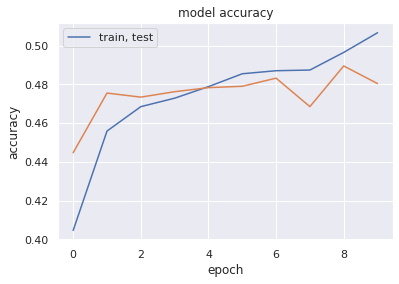

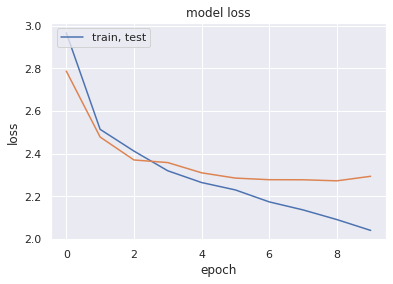

<Figure size 432x288 with 0 Axes>

In [119]:
print(dnn.summary())

dnn.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

h=dnn.fit(X_train_nn, y_train_nn, epochs=20, validation_split=0.2,
       batch_size=64, verbose=2, callbacks = callbacks)
print('Training Accuracy:', dnn.evaluate(X_train_nn, y_train_nn)[1]*100)
EvalulateModel(dnn, X_test_nn, y_test_nn)
PlotAccAndLoss(h)

Convolutional Neural Network

In [120]:
# Build CNN Model

def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                300,
                                weights=[embeddings_matrix],
                                input_length=max_len,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    return model

Filter   5
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 300)     3942900     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 199, 128)     76928       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 198, 128)     115328      embedding[0][0]                  
___________________________________________________________________________________

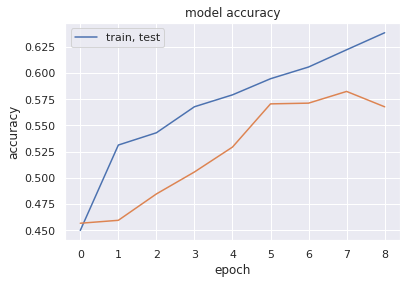

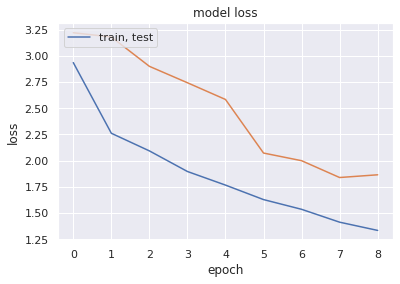

<Figure size 432x288 with 0 Axes>

In [121]:
# Train the network and run classification
cnn = Build_Model_CNN_Text(tokenizer.word_index,emb_300, 74)
print(cnn.summary())

cnn.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

h=cnn.fit(X_train_nn, y_train_nn, epochs=epochs, validation_split=0.2,
       batch_size=batch_size, verbose=2, callbacks = callbacks)

print('Training Accuracy:', cnn.evaluate(X_train_nn, y_train_nn)[1]*100)

EvalulateModel(cnn, X_test_nn, y_test_nn)

PlotAccAndLoss(h)

RNN Based LSTM

In [122]:
# LSTM Model
# Let's build a simple LSTM Model

lstm = Sequential()
lstm.add(Embedding(num_words, 300, input_length = max_len, trainable = True, embeddings_initializer=Constant(emb_300),))
lstm.add(Bidirectional(LSTM(256, return_sequences=True,)))
lstm.add(GlobalMaxPool1D())
lstm.add(Dense(512, kernel_initializer='uniform'))
lstm.add(Activation('relu'))
lstm.add(Dropout(0.5, input_shape=(128,)))
lstm.add(Dense(512, kernel_initializer='uniform'))
lstm.add(Activation('relu'))
lstm.add(Dropout(0.5, input_shape=(128,)))
lstm.add(Dense(512, kernel_initializer='uniform'))
lstm.add(Activation('relu'))
lstm.add(Dropout(0.5, input_shape=(128,)))
lstm.add(Dense(74, activation='softmax'))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 300)          3942900   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 512)          1140736   
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)              

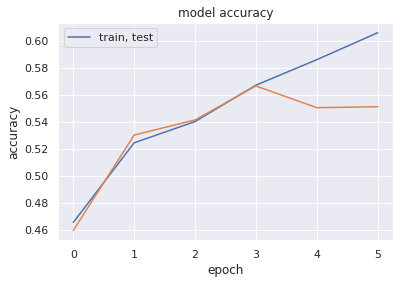

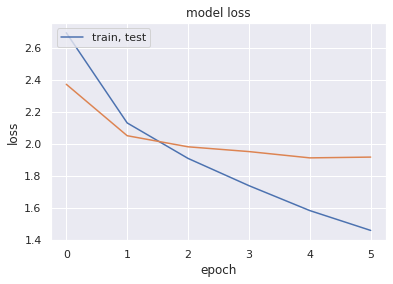

<Figure size 432x288 with 0 Axes>

In [123]:
print(lstm.summary())

lstm.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

h=lstm.fit(X_train_nn, y_train_nn, epochs=epochs, validation_split=0.2,
       batch_size=batch_size, verbose=2, callbacks = callbacks)

print('Training Accuracy:', lstm.evaluate(X_train_nn, y_train_nn)[1]*100)

EvalulateModel(lstm, X_test_nn, y_test_nn)

PlotAccAndLoss(h)

**Improve the model performance by hyper tuning**

1. Try glove embeddings with size 100, 200 and 300
2. Try to learn embeddings instead of using glove embeddings
3. For LSTM Model, try unidirectional as well as bidirectional LSTM
4. For LSTM Model, try different no. of LSTM layers. Try with different no. of LSTM units like 64, 128, 256 etc. in each layer of the LSTM architecture
5. Try different optimizers like Adam, RMS Prop by varying the learning rate
6. Try different activation functions like ReLu, P-ReLu, Leaky ReLu etc
7. Try working with data belonging to top 5 and top 10 groups to address the class imbalance issue
8. Try including Caller information in the input dataset.

###################### END OF MILESTONE 1 #########################